# TP 1 - Aprendizado de Máquina
## Aluno: Roberto Schor

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

import matplotlib.pyplot as pl

import random

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn import feature_selection

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('koi_data.csv')
    
# Test
print("Dataset has {} data points with {} variables each.".format(*data.shape))

Dataset has 5202 data points with 43 variables each.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 43 columns):
kepoi_name          5202 non-null object
koi_disposition     5202 non-null object
koi_period          5202 non-null float64
koi_impact          5202 non-null float64
koi_duration        5202 non-null float64
koi_depth           5202 non-null float64
koi_ror             5202 non-null float64
koi_srho            5202 non-null float64
koi_prad            5202 non-null float64
koi_sma             5202 non-null float64
koi_incl            5202 non-null float64
koi_teq             5202 non-null float64
koi_insol           5202 non-null float64
koi_dor             5202 non-null float64
koi_max_sngle_ev    5202 non-null float64
koi_max_mult_ev     5202 non-null float64
koi_model_snr       5202 non-null float64
koi_steff           5202 non-null float64
koi_slogg           5202 non-null float64
koi_smet            5202 non-null float64
koi_srad            5202 non-null float64
koi_smass    

In [3]:
data.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [4]:
# Test how many Confirmed and False Positive the data contains
cat_cols = ["koi_disposition"]

for c in cat_cols:
    display((data[c].value_counts().sort_index()/len(data)*100).round(2).to_frame(c +" (%)").T)

,CONFIRMED,FALSE POSITIVE
koi_disposition (%),40.45,59.55


In [5]:
# Target that we will search for to validate in our models after normalizing Confirmed to 1 and False Positive to 0

data['koi_disposition'] = (data['koi_disposition'] == "CONFIRMED").astype(int)

TARGET = data['koi_disposition']

print("Resultado:")

display(data['koi_disposition'].sample(10))

Resultado:


2666    0
1564    0
2344    1
1352    1
2676    0
1670    1
2817    0
616     0
2443    0
1436    1
Name: koi_disposition, dtype: int32

In [6]:
corr_matrix = data.corr()

In [7]:
corr_matrix["koi_disposition"].sort_values(ascending=False)

koi_disposition     1.000000
koi_smet            0.344450
koi_incl            0.342036
koi_fwm_stat_sig    0.332648
koi_slogg           0.173083
koi_fwm_sdec        0.125310
koi_gmag            0.060386
koi_fwm_sdeco       0.043363
koi_kepmag          0.041710
koi_rmag            0.040140
koi_dikco_mdec      0.031571
koi_imag            0.031365
koi_dicco_mdec      0.028903
koi_zmag            0.028890
koi_fwm_srao        0.027213
koi_jmag            0.022043
koi_dicco_mra       0.019600
koi_dikco_mra       0.015045
koi_hmag            0.012507
koi_kmag            0.010756
koi_fwm_prao        0.003319
koi_fwm_pdeco      -0.004689
koi_prad           -0.024352
koi_srho           -0.037155
koi_dor            -0.042489
koi_sma            -0.045140
koi_ror            -0.066605
koi_insol          -0.075110
koi_period         -0.086989
koi_impact         -0.089902
koi_srad           -0.098179
koi_duration       -0.151662
koi_max_sngle_ev   -0.177150
koi_smass          -0.181940
koi_max_mult_e

In [8]:
# Features after dropiong the target data

features = data.drop(['koi_disposition','kepoi_name'], axis = 1)

In [9]:
# Columns with numerical data
features_col = list(data.columns.values)[2:]

In [10]:
#Separate the confirmed from the false data for the histogram plots

confirmed_data=data['koi_disposition']==1

false_data=data['koi_disposition']==0

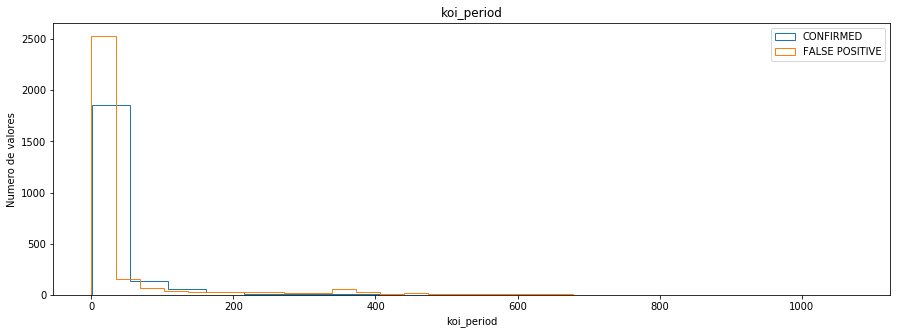

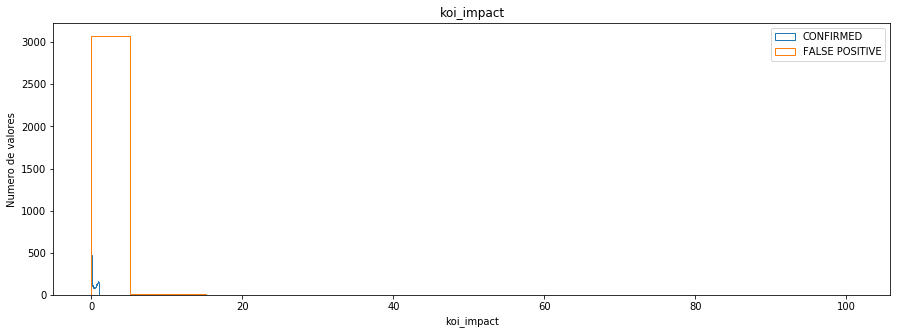

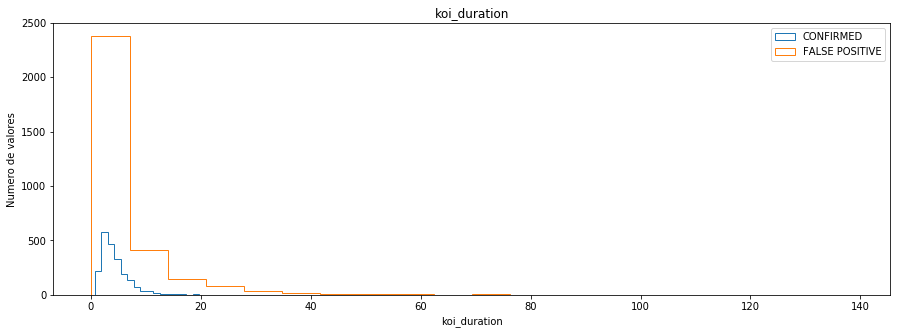

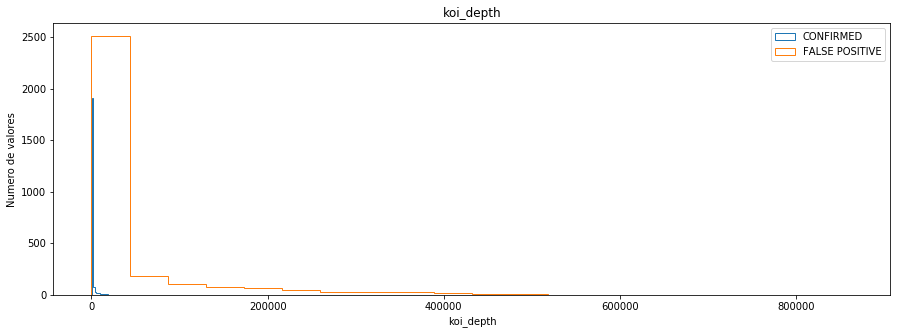

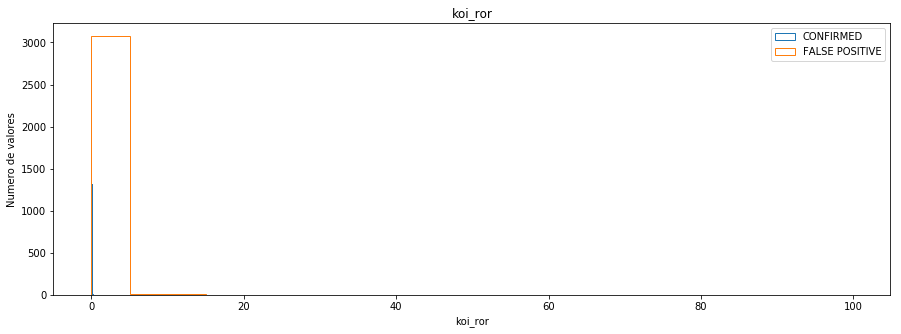

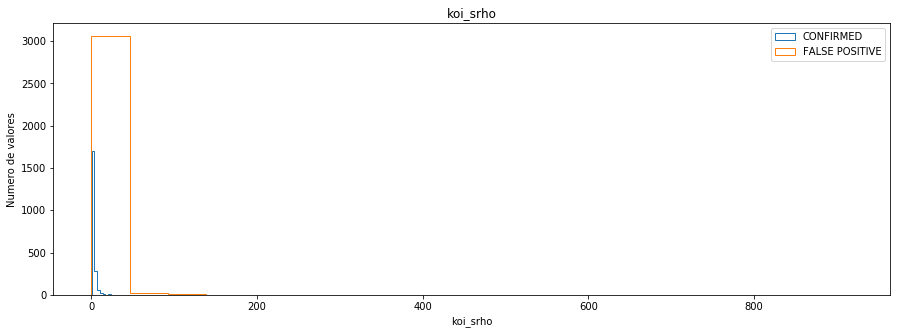

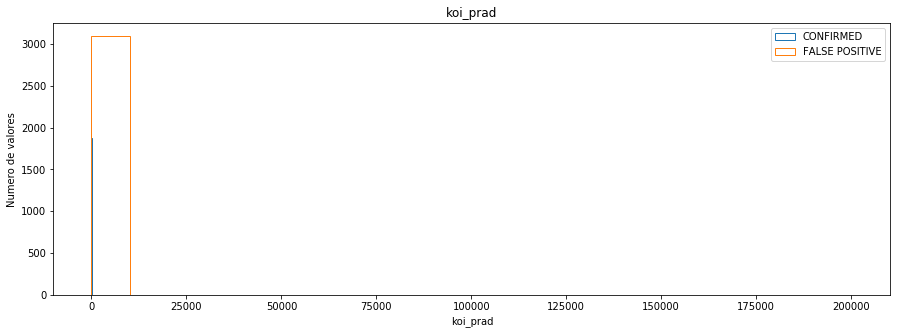

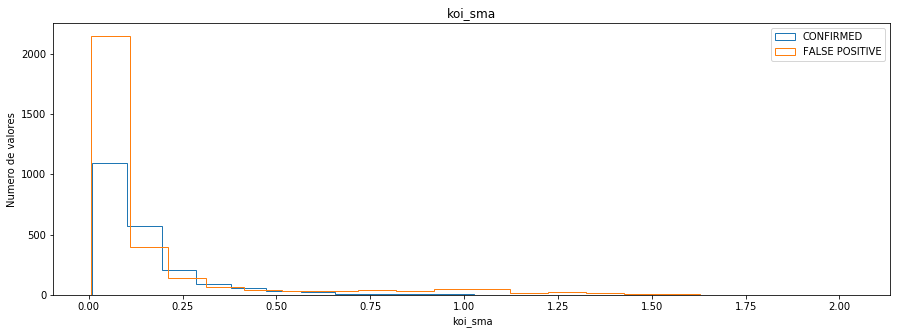

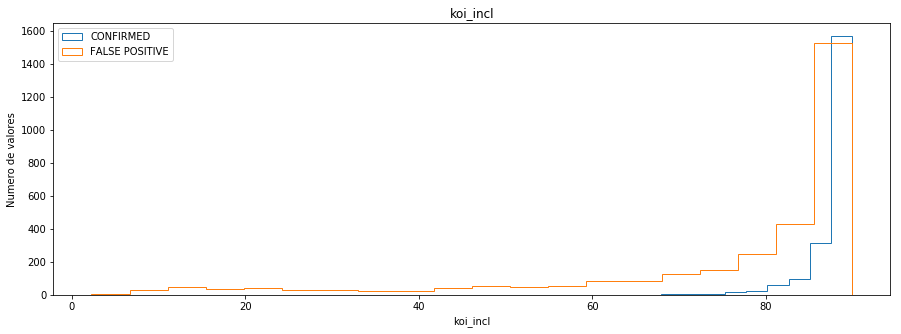

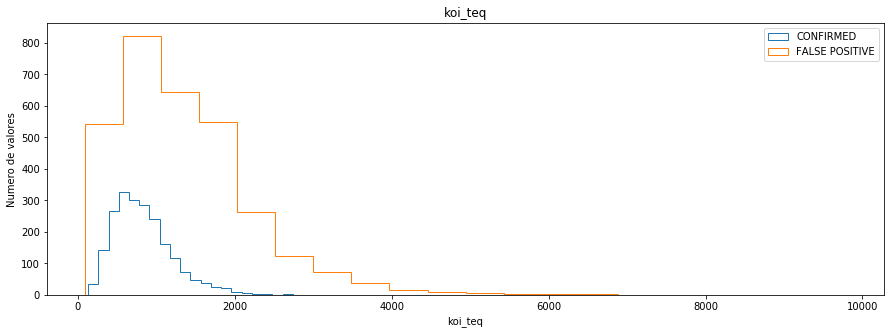

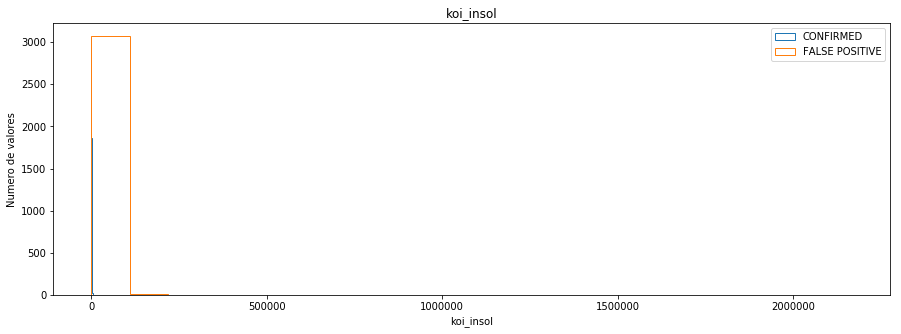

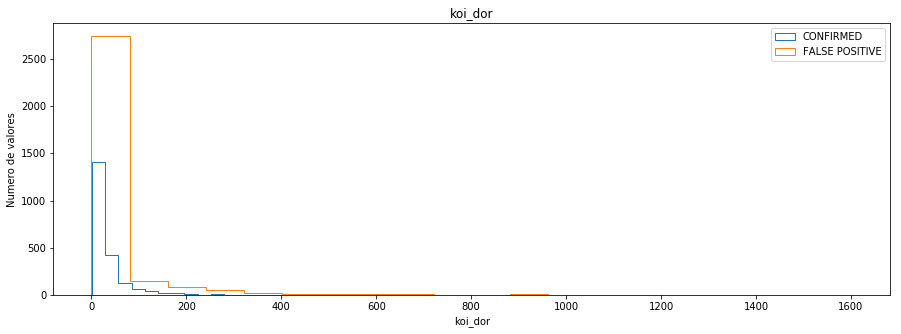

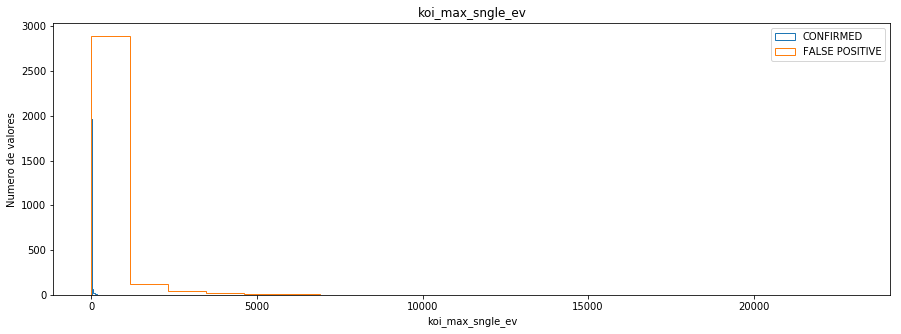

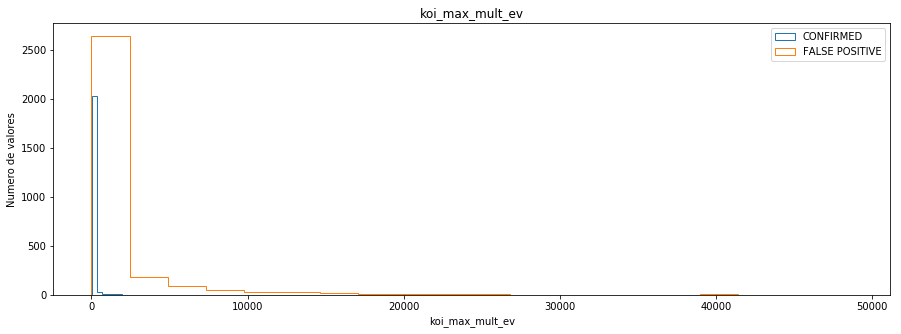

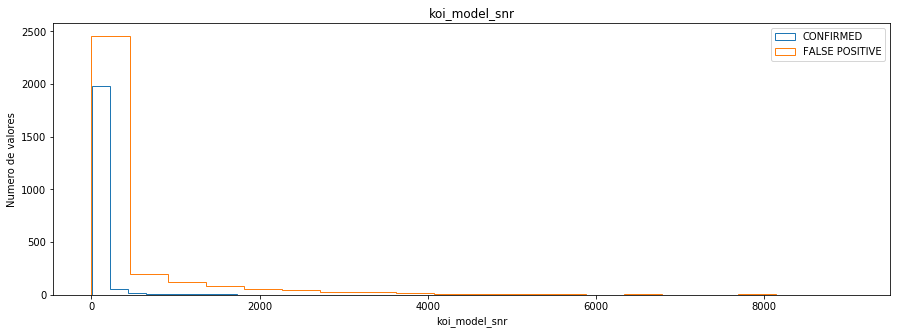

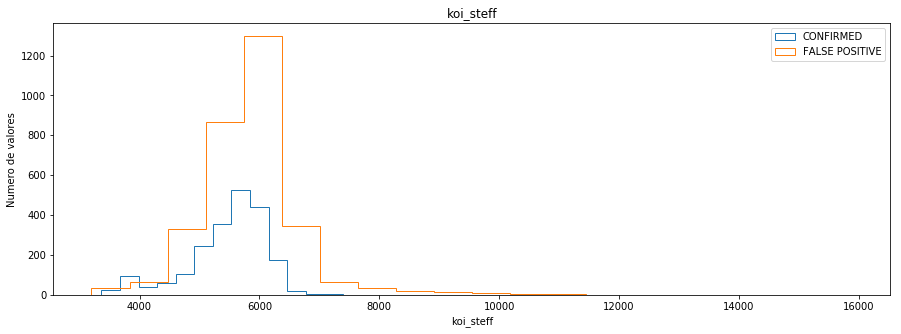

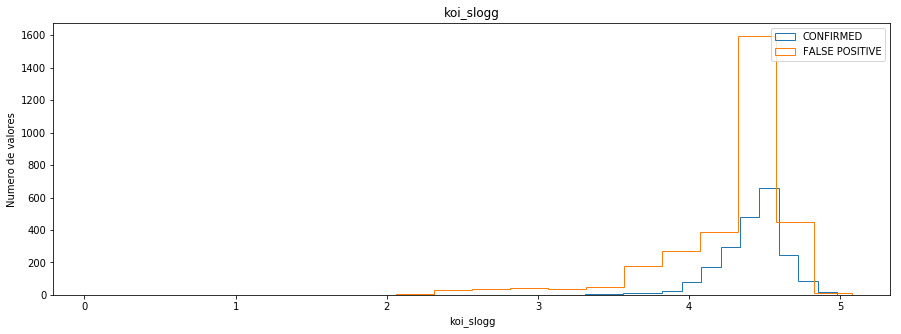

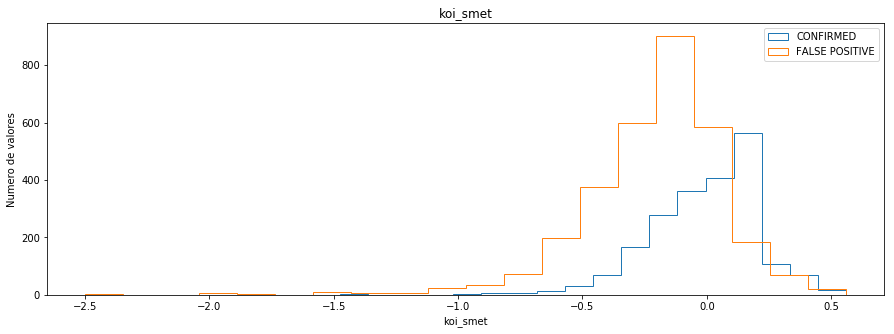

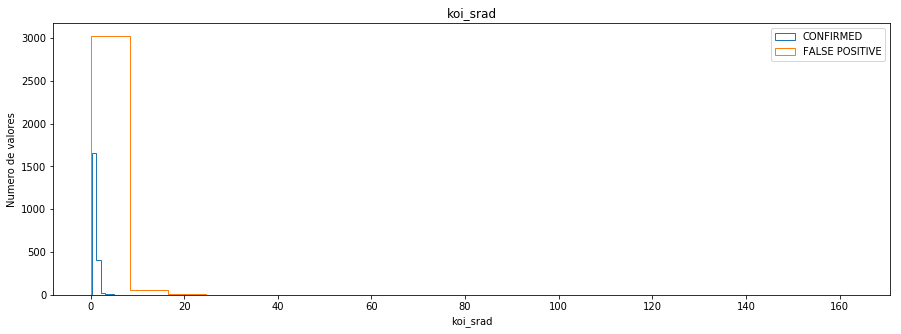

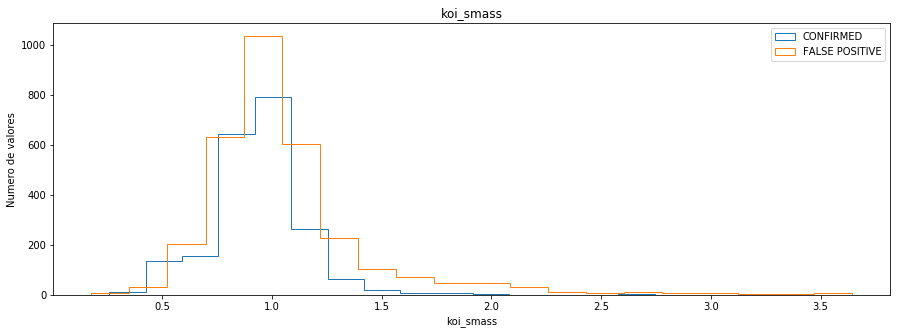

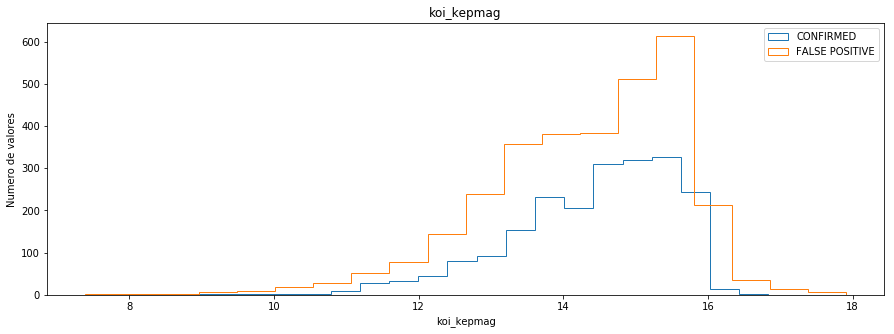

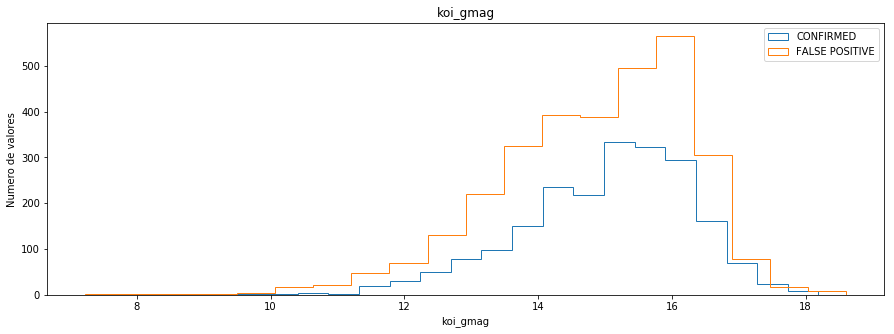

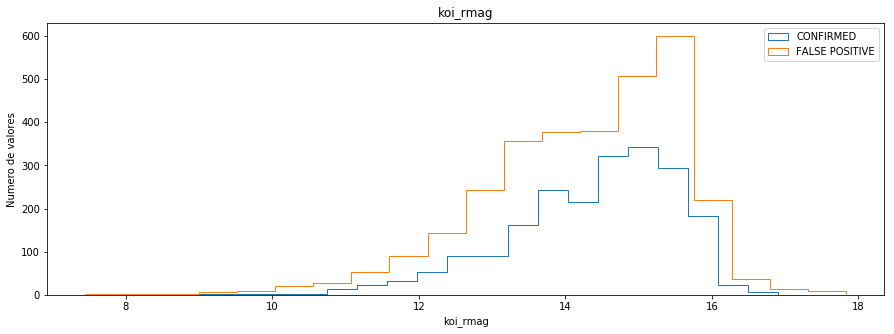

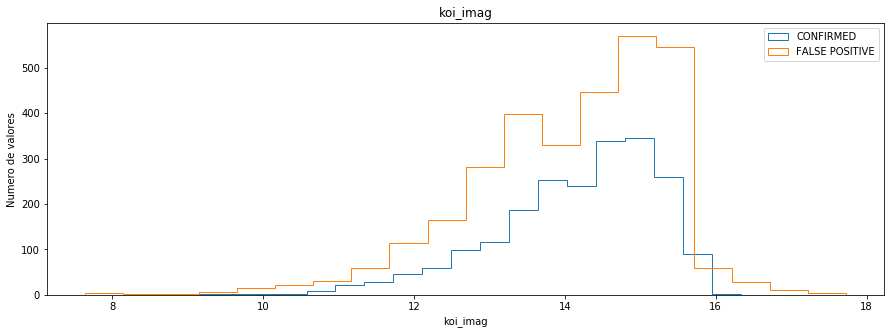

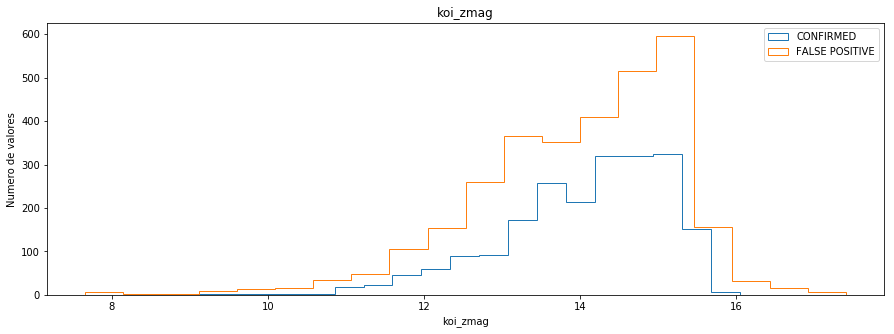

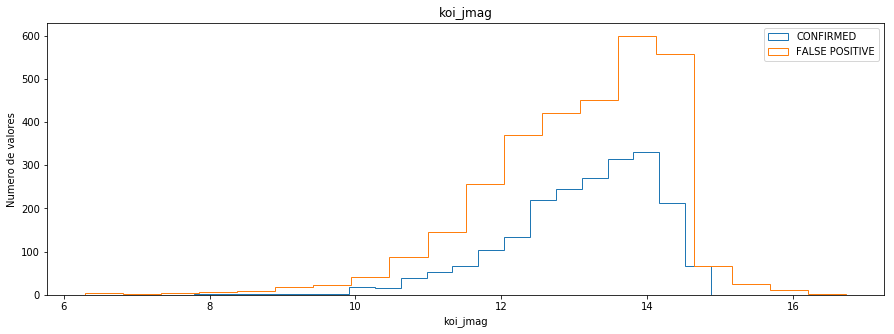

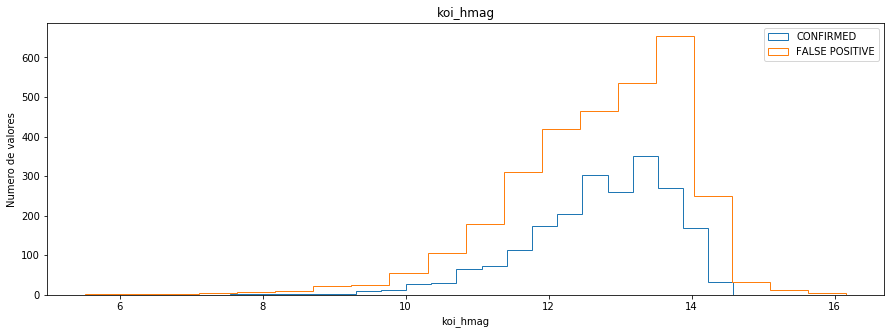

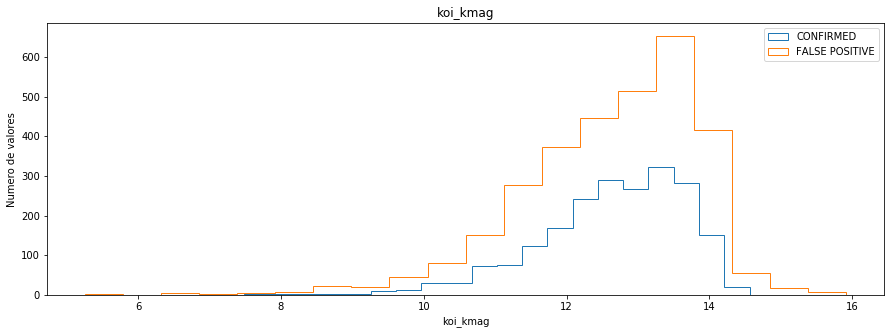

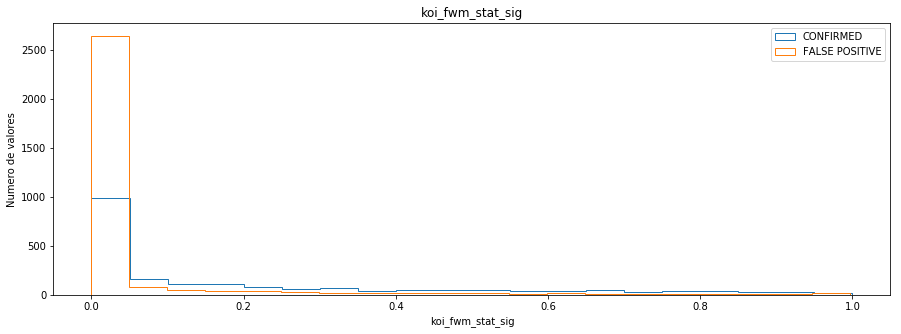

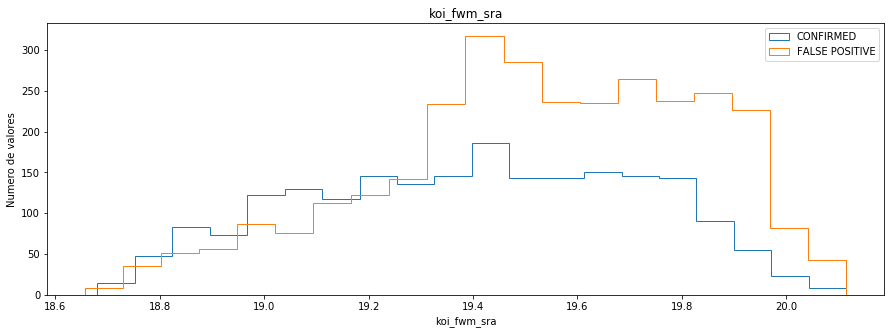

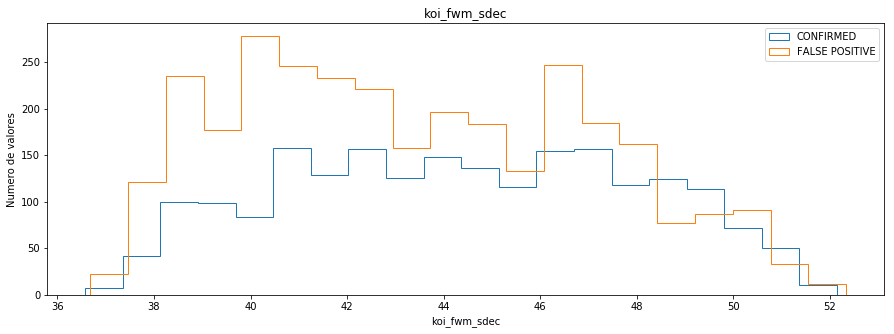

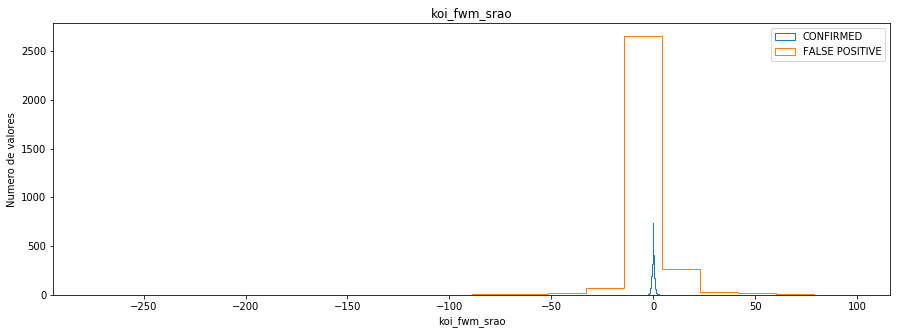

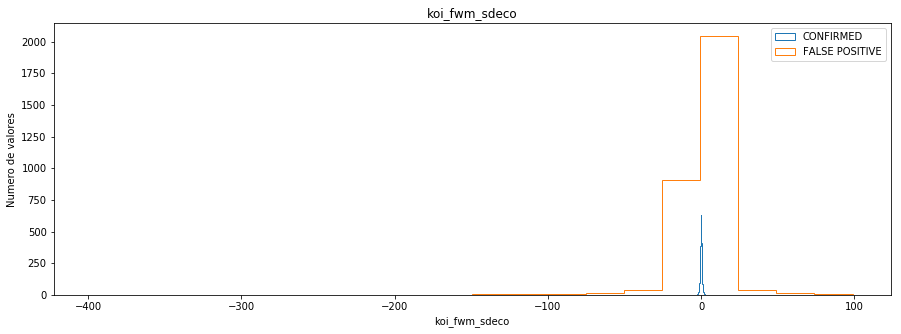

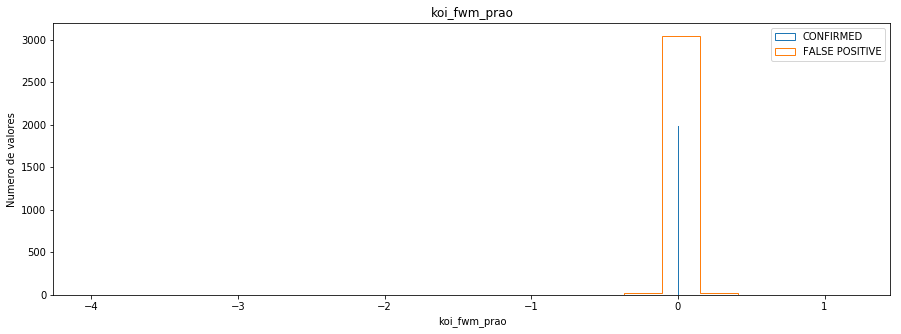

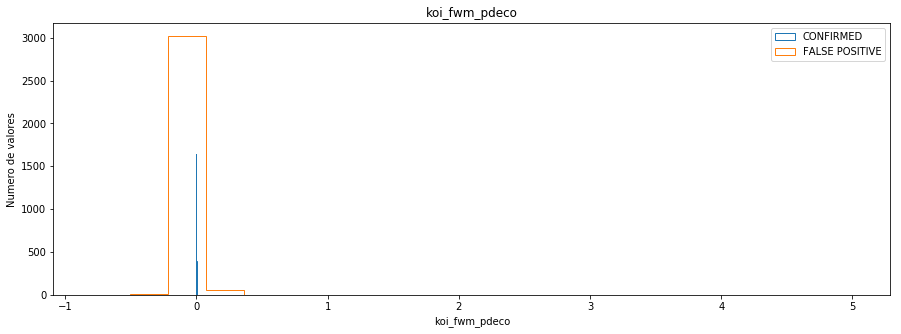

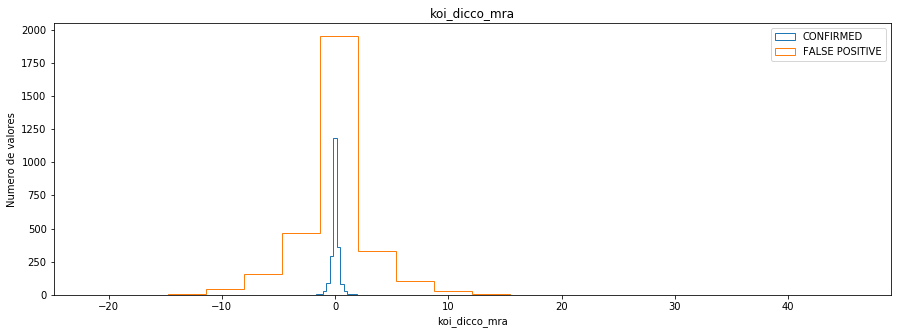

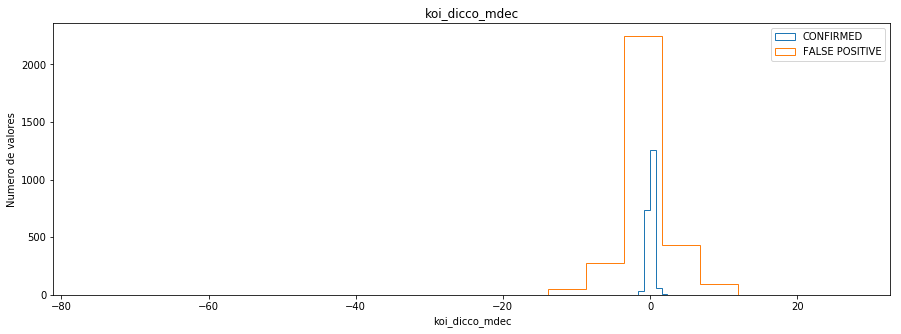

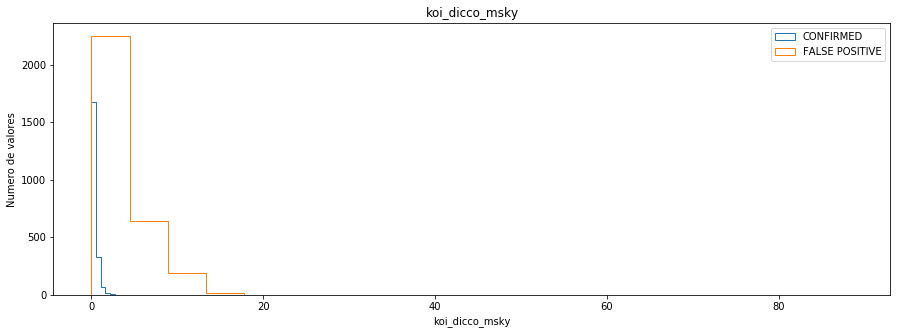

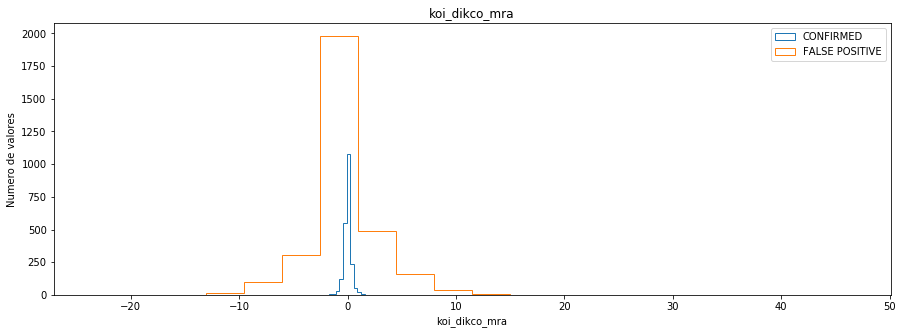

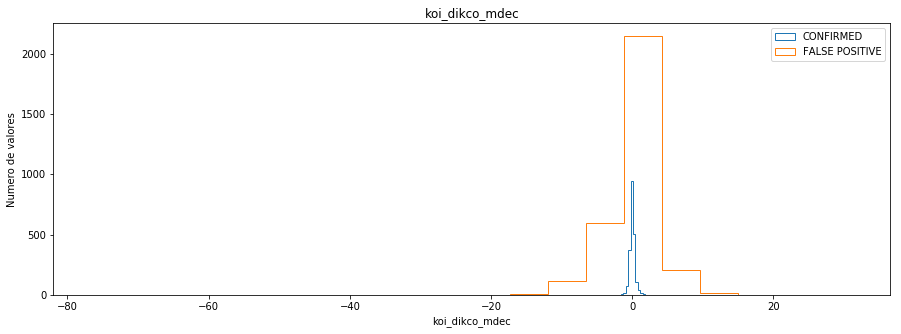

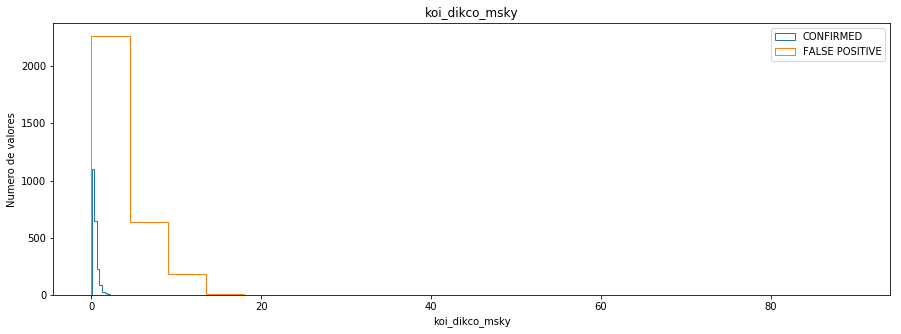

In [11]:
for c in features_col:
    pl.figure(figsize=(15, 5))
    pl.hist(data[confirmed_data][c], bins=20, label='CONFIRMED',histtype='step', stacked=True, fill=False)
    pl.hist(data[false_data][c], bins=20, label='FALSE POSITIVE',histtype='step', stacked=True, fill=False)
    pl.title(c)
    pl.xlabel(c)
    pl.legend()
    pl.ylabel("Numero de valores")
    pl.show()

In [12]:
#Drop number of features to 20 without losing the features names

selector = feature_selection.SelectKBest(feature_selection.f_classif, 20)

skb = selector.fit_transform(data[features_col], data["koi_disposition"])

mask = selector.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, features_col):
    if bool:
        new_features.append(feature)
        
#Reference: https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le

In [13]:
print(skb)

[[ 9.48804  0.146    2.9575  ... 48.14191  0.2      0.32   ]
 [54.41838  0.586    4.507   ... 48.14199  0.39     0.5    ]
 [ 1.73695  1.276    2.40641 ... 48.28521  0.289    0.276  ]
 ...
 [ 0.5277   1.252    3.2221  ... 47.09369  2.763    2.929  ]
 [ 0.6814   0.147    0.865   ... 47.17472  5.       5.16   ]
 [ 4.85603  0.134    3.078   ... 47.12349  3.4      3.5    ]]


In [14]:
new_skb=pd.DataFrame(skb, columns=new_features)

In [15]:
new_skb.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_incl,koi_teq,koi_insol,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_dicco_msky,koi_dikco_msky
0,9.48804,0.146,2.95750,615.8,89.66,793.0,93.59,5.13585,28.47082,35.8,5455.0,4.467,0.14,0.927,0.919,0.002,19.46229,48.14191,0.200,0.320
1,54.41838,0.586,4.50700,874.8,89.57,443.0,9.11,7.02767,20.10951,25.8,5455.0,4.467,0.14,0.927,0.919,0.003,19.46226,48.14199,0.390,0.500
2,1.73695,1.276,2.40641,8079.2,67.09,1395.0,891.96,39.06655,541.89510,505.6,5805.0,4.564,-0.52,0.791,0.836,0.000,19.03564,48.28521,0.289,0.276
3,2.52559,0.701,1.65450,603.3,85.41,1406.0,926.16,4.74994,33.19190,40.9,6031.0,4.438,0.07,1.046,1.095,0.733,19.25033,48.22626,0.100,0.070
4,7.36179,1.169,5.02200,233.7,60.92,1342.0,767.22,10.96468,46.15308,47.7,6227.0,3.986,0.00,1.958,1.358,0.000,19.92395,42.15826,8.930,8.948


In [16]:
new_skb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 20 columns):
koi_period          5202 non-null float64
koi_impact          5202 non-null float64
koi_duration        5202 non-null float64
koi_depth           5202 non-null float64
koi_incl            5202 non-null float64
koi_teq             5202 non-null float64
koi_insol           5202 non-null float64
koi_max_sngle_ev    5202 non-null float64
koi_max_mult_ev     5202 non-null float64
koi_model_snr       5202 non-null float64
koi_steff           5202 non-null float64
koi_slogg           5202 non-null float64
koi_smet            5202 non-null float64
koi_srad            5202 non-null float64
koi_smass           5202 non-null float64
koi_fwm_stat_sig    5202 non-null float64
koi_fwm_sra         5202 non-null float64
koi_fwm_sdec        5202 non-null float64
koi_dicco_msky      5202 non-null float64
koi_dikco_msky      5202 non-null float64
dtypes: float64(20)
memory usage: 812.9 KB


In [17]:
# Normalization from all of the features

features = new_skb

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features) 
features = pd.DataFrame(features, columns=new_features)

features.head()

,koi_period,koi_impact,koi_duration,koi_depth,koi_incl,koi_teq,koi_insol,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_dicco_msky,koi_dikco_msky
0,-0.311553,-0.217320,-0.380571,-0.309398,0.519927,-0.452127,-0.097382,-0.224936,-0.252254,-0.313654,-0.309824,0.350918,0.929173,-0.160045,-0.272079,-0.506216,-0.029860,1.184457,-0.549766,-0.509227
1,0.196655,-0.049889,-0.158005,-0.305531,0.514408,-0.903324,-0.099703,-0.222347,-0.254613,-0.325489,-0.309824,0.350918,0.929173,-0.160045,-0.272079,-0.501868,-0.029955,1.184479,-0.489396,-0.451947
2,-0.399225,0.212673,-0.459729,-0.197976,-0.864118,0.323932,-0.075449,-0.178512,-0.107390,0.242345,0.132024,0.601041,-1.377498,-0.200594,-0.515481,-0.514911,-1.379602,1.223898,-0.521487,-0.523229
3,-0.390305,-0.006129,-0.567731,-0.309585,0.259307,0.338113,-0.074509,-0.225464,-0.250922,-0.307619,0.417331,0.276138,0.684526,-0.124565,0.244052,2.671931,-0.700413,1.207673,-0.581540,-0.588782
4,-0.335603,0.171957,-0.084032,-0.315102,-1.242477,0.255608,-0.078875,-0.216961,-0.247265,-0.299571,0.664766,-0.889383,0.439879,0.147349,1.015316,-0.514911,1.430638,-0.462412,2.224084,2.236391


In [18]:
#Separate the training from the validation set

X_train, X_test, y_train, y_test = train_test_split(features, TARGET, test_size=0.2, random_state=54)

In [19]:
#Slpit our K fold to do the k fold cross validation afterwards, it will be based from our training set

kf = KFold(5)
kf.get_n_splits(X_train)

5

## Naive Bayes

In [20]:
#Importing the Naive Bayes model to gnb and then fitting our training set with this model.

def fit_gnb(X_train, y_train):
    #initializing the model to be evaluated - Naive Bayes
    gnb = GaussianNB()
    #initializing the mean list
    
    score_mean=[]

    for k, (train, test) in enumerate(kf.split(X_train, y_train)):
        gnb.fit(X_train.iloc[train], y_train.iloc[train])
        score_val=gnb.score(X_train.iloc[test], y_train.iloc[test])
        score_mean.append(score_val)
        print("[fold {0}] , score: {1:.5f}".format(k, score_val))

    score_mean_np=np.asarray(score_mean)
    mean_k_score=score_mean_np.mean()
    
    print("Mean score = {0:.5f}".format(mean_k_score))
    return gnb, mean_k_score

In [21]:
#Evaluating the accuray of our trained model against our validation data set.

gnb, _ = fit_gnb(X_train,y_train)
accuracy_score(gnb.predict(X_test), y_test)

[fold 0] , score: 0.89076
[fold 1] , score: 0.90865
[fold 2] , score: 0.88101
[fold 3] , score: 0.88101
[fold 4] , score: 0.91466
Mean score = 0.89522


0.8924111431316042

In [22]:
classes = ["CONFIRMED", "FALSE POSITIVE"]
y_pred_gnb = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred_gnb, [0, 1], classes))
area_roc_gnb=metrics.roc_auc_score(y_test,y_pred_gnb)

                precision    recall  f1-score   support

     CONFIRMED       0.97      0.85      0.90       607
FALSE POSITIVE       0.82      0.96      0.88       434

   avg / total       0.90      0.89      0.89      1041



In [23]:
# Matriz de Confusao

def confusion_matriz(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)

    fig, ax = pl.subplots(figsize=(7, 7))
    im = ax.imshow(cm, interpolation='nearest', cmap=pl.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title="Matriz de Confusão",
           ylabel="Real",
           xlabel="Predito")

    pl.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], "d"),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max()/2. else "black")
    fig.tight_layout()
    pl.show()

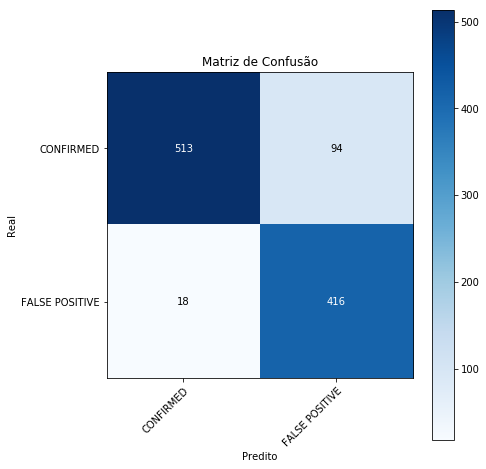

In [24]:
confusion_matriz(y_test,y_pred_gnb)

In [25]:
#Evaluation for ROC curve

y_proba_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = metrics.roc_curve(y_test, y_proba_gnb)

### Decision Tree

We will vary the depth of the tree. 

The decision tree depth is how many levels the tree have.

The lower the level of the final leaf (biggest max_depth), the more complex the model is and it can even overfit.

In [26]:
#Importing the Decision Tree Classifier model to dtc and then fitting our training set with this model.

def fit_dtc(max_depth=None):
    dtc=DecisionTreeClassifier(max_depth=max_depth)

    #initializing the mean list
    score_mean=[]

    for k, (train, test) in enumerate(kf.split(X_train, y_train)):
        dtc.fit(X_train.iloc[train], y_train.iloc[train])
        score_val=dtc.score(X_train.iloc[test], y_train.iloc[test])
        score_mean.append(score_val)
        #line for debuging
        #print("[fold {0}] , score: {1:.5f}".format(k, score_val))

    score_mean_np=np.asarray(score_mean)
    mean_k_score=score_mean_np.mean()
    
    #PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
    predictedprobDTC = dtc.predict_proba(X_test)
    
    #GET ROC DATA
    fpr_dtc, tpr_dtc, _ = metrics.roc_curve(y_test, predictedprobDTC[:,1])
    
    #line for debuging
    #print("Mean score = {0:.5f}".format(mean_k_score))
    return dtc, fpr_dtc, tpr_dtc, mean_k_score

In [27]:
def fit_score_plot(train_scores, test_scores, complexity, name, plim=[0.7,1.05]):
    
    #Name of the plot = Name
    
    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('{} Complexity Performance'.format(name))
    pl.plot(complexity, train_scores, 'o-', color = 'r', label = 'Training Score')
    pl.plot(complexity, test_scores, 'o-', color = 'g', label = 'Validation Score')

    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Complexity')
    pl.ylabel('Score')
    pl.ylim(plim)
    pl.show()

In [28]:
#This time using max_depth = 6, based uppon the previous graphics

#Initilize the dictionary for the traning scores
score_dict_training = {}

#Initilize the dictionary for the test (validation) scores
score_dict_test = {}

#Initilize the lis for decision tree scores

dtc_score_training_list=[]

dtc_score_test_list=[]

max_depth=[1,5,10,20,40,80,100]

for i in max_depth:
    dtc,_,_, dtc_score_cv = fit_dtc(i)
    dtc_score_training_list.append(dtc_score_cv)
    val_score=accuracy_score(dtc.predict(X_test), y_test)
    dtc_score_test_list.append(val_score)

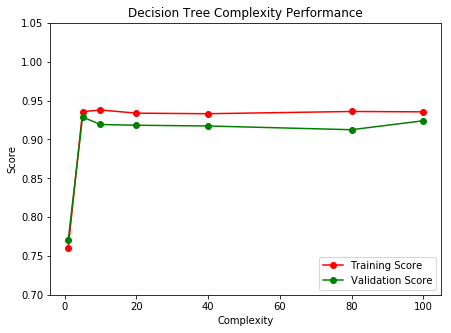

In [29]:
score_dict_training["dtc_score"]=dtc_score_training_list
score_dict_test["dtc_score"]=dtc_score_test_list

fit_score_plot(np.asarray(score_dict_training["dtc_score"]), np.asarray(score_dict_test["dtc_score"]), max_depth, "Decision Tree")

As the depth increases the training score will increase leading to overfiting the model.

For this model it was chosen a number of levels which the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [30]:
#Importing the Decision Tree Classifier model to dtc and then fitting our training set with this model.
#This time using max_depth = None
dtc, fpr_dtc, tpr_dtc, _ = fit_dtc()

accuracy_score(dtc.predict(X_test), y_test)


0.9106628242074928

For this case the best model should be a tree of max_depth=6. After that the test model start to decrease as the training model is increasing. That indicates that the model is heading to Overfiting.

In [31]:
dtc, fpr_dtc, tpr_dtc, _ = fit_dtc(6)

accuracy_score(dtc.predict(X_test), y_test)

0.9327569644572526

In [32]:
y_pred_dtc = dtc.predict(X_test)
y_proba_dtc = dtc.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_dtc, [0, 1], classes))

area_roc_dtc=metrics.roc_auc_score(y_test,y_pred_dtc)

                precision    recall  f1-score   support

     CONFIRMED       0.95      0.93      0.94       607
FALSE POSITIVE       0.91      0.93      0.92       434

   avg / total       0.93      0.93      0.93      1041



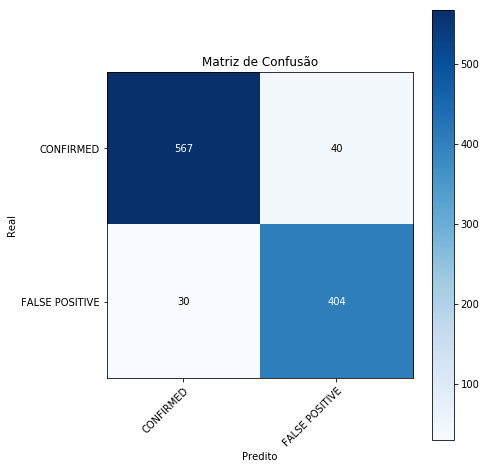

In [33]:
confusion_matriz(y_test,y_pred_dtc)

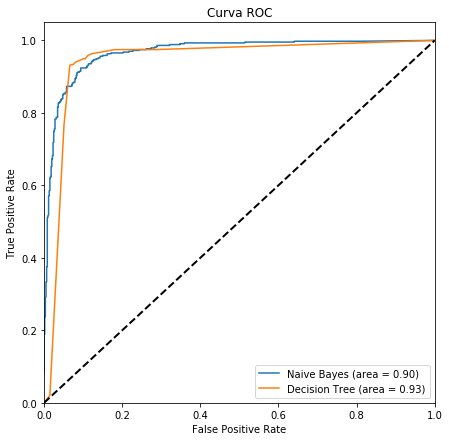

In [34]:
pl.figure(figsize=(7, 7))
lw = 2
pl.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (area = %0.2f)' % area_roc_gnb)
pl.plot(fpr_dtc, tpr_dtc, label='Decision Tree (area = %0.2f)' % area_roc_dtc)
pl.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.legend(loc='best')
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Curva ROC')
pl.show()

As the Area beneath the curve is higher with Decision Tree, the model performs better than the Naive Bayes for this data set.

## SVM

For this model we will vary the C hyperparameter. It is the penalty parameter C of the error term.

The highest the value the highest number of points which will be accepted within the width of the support vector.

In this work it will also be evaluated the kernel trick to implicityly map instances into a very high-dimensioanlspace, therefore enabling nonlinear classification and regression with SVM.

In [35]:
def fit_svm(x_train, y_train, x_val, y_val, C_in, gamma_in='auto', kernel_in = "linear"):
    
    #Importing the Support Vector model to clf and then fitting our training set with this model.
    
    clf = svm.SVC(kernel=kernel_in, gamma=gamma_in, C=C_in, probability=True)

    #initializing the mean list
    score_mean=[]

    for k, (train, test) in enumerate(kf.split(X_train, y_train)):
        clf.fit(X_train.iloc[train], y_train.iloc[train])
        score_val=clf.score(X_train.iloc[test], y_train.iloc[test])
        score_mean.append(score_val)
        

    score_mean_np=np.asarray(score_mean)
    mean_score=score_mean_np.mean()
    
    
    val_acc=accuracy_score(clf.predict(X_test), y_test)
    
    #PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
    predictedprobSVC = clf.predict_proba(x_val)
    
    #GET ROC DATA
    fpr_svm, tpr_svm, _ = metrics.roc_curve(y_val, predictedprobSVC[:,1])
    
    return clf, fpr_svm, tpr_svm, mean_score

In [36]:
kernels = ["linear", "sigmoid","poly","rbf"]

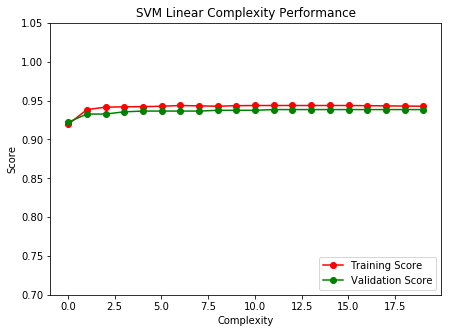

In [37]:
#Initilize the lis for svm scores

svm_l_score_training_list=[]

svm_l_score_test_list=[]

C=np.arange(0.01,20,1)

for i in C:
    svm_l, fpr_svm_l, tpr_svm_l, svm_score_cv = fit_svm(X_train, y_train, X_test, y_test, i, kernel_in=kernels[0])
    svm_l_score_training_list.append(svm_score_cv)
    val_score=accuracy_score(svm_l.predict(X_test), y_test)
    svm_l_score_test_list.append(val_score)

score_dict_training["svm_l_score"]=svm_l_score_training_list
score_dict_test["svm_l_score"]=svm_l_score_test_list

fit_score_plot(np.asarray(score_dict_training["svm_l_score"]), np.asarray(score_dict_test["svm_l_score"]), C, "SVM Linear")

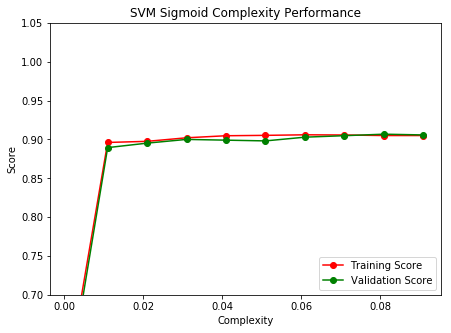

In [38]:
#Initilize the lis for svm scores

svm_s_score_training_list=[]

svm_s_score_test_list=[]

C=np.arange(0.001,0.1,0.01)

for i in C:
    svm_s, fpr_svm_s, tpr_svm_s, svm_score_cv = fit_svm(X_train, y_train, X_test, y_test, i, kernel_in=kernels[1])
    svm_s_score_training_list.append(svm_score_cv)
    val_score=accuracy_score(svm_s.predict(X_test), y_test)
    svm_s_score_test_list.append(val_score)

score_dict_training["svm_s_score"]=svm_s_score_training_list
score_dict_test["svm_s_score"]=svm_s_score_test_list

fit_score_plot(np.asarray(score_dict_training["svm_s_score"]), np.asarray(score_dict_test["svm_s_score"]), C, "SVM Sigmoid")

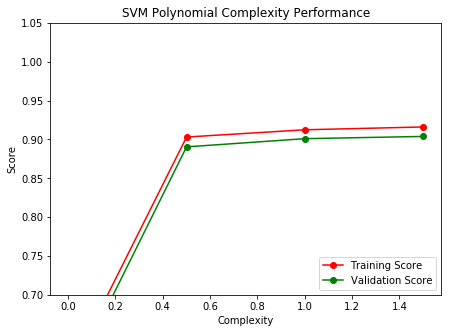

In [39]:
#Initilize the lis for svm scores

svm_p_score_training_list=[]

svm_p_score_test_list=[]

C=np.arange(0.001,2,0.5)

for i in C:
    svm_p, fpr_svm_p, tpr_svm_p, svm_score_cv = fit_svm(X_train, y_train, X_test, y_test, i, kernel_in=kernels[2])
    svm_p_score_training_list.append(svm_score_cv)
    val_score=accuracy_score(svm_p.predict(X_test), y_test)
    svm_p_score_test_list.append(val_score)

score_dict_training["svm_p_score"]=svm_p_score_training_list
score_dict_test["svm_p_score"]=svm_p_score_test_list

fit_score_plot(np.asarray(score_dict_training["svm_p_score"]), np.asarray(score_dict_test["svm_p_score"]), C, "SVM Polynomial")

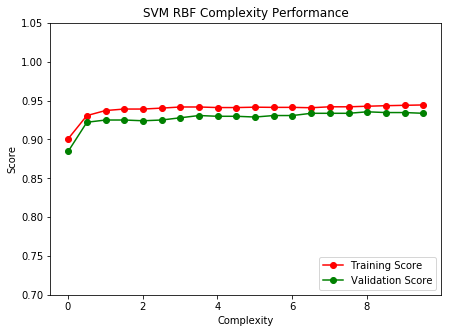

In [40]:
#Initilize the lis for svm scores

svm_r_score_training_list=[]

svm_r_score_test_list=[]

C=np.arange(0.01,10,0.5)

for i in C:
    svm_r, fpr_svm_r, tpr_svm_r, svm_score_cv = fit_svm(X_train, y_train, X_test, y_test, i, kernel_in=kernels[3])
    svm_r_score_training_list.append(svm_score_cv)
    val_score=accuracy_score(svm_r.predict(X_test), y_test)
    svm_r_score_test_list.append(val_score)

score_dict_training["svm_r_score"]=svm_r_score_training_list
score_dict_test["svm_r_score"]=svm_r_score_test_list

fit_score_plot(np.asarray(score_dict_training["svm_r_score"]), np.asarray(score_dict_test["svm_r_score"]), C, "SVM RBF")

In [41]:
y_pred_svm_l = svm_l.predict(X_test)
y_proba_svm_l = svm_l.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_svm_l, [0, 1], classes))

area_roc_svm_l=metrics.roc_auc_score(y_test,y_pred_svm_l)

                precision    recall  f1-score   support

     CONFIRMED       0.96      0.94      0.95       607
FALSE POSITIVE       0.91      0.94      0.93       434

   avg / total       0.94      0.94      0.94      1041



In [42]:
y_pred_svm_s = svm_s.predict(X_test)
y_proba_svm_s = svm_s.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_svm_s, [0, 1], classes))

area_roc_svm_s=metrics.roc_auc_score(y_test,y_pred_svm_s)

                precision    recall  f1-score   support

     CONFIRMED       0.96      0.88      0.92       607
FALSE POSITIVE       0.85      0.94      0.89       434

   avg / total       0.91      0.91      0.91      1041



In [43]:
y_pred_svm_p = svm_p.predict(X_test)
y_proba_svm_p = svm_p.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_svm_p, [0, 1], classes))

area_roc_svm_p=metrics.roc_auc_score(y_test,y_pred_svm_p)

                precision    recall  f1-score   support

     CONFIRMED       0.96      0.87      0.91       607
FALSE POSITIVE       0.84      0.95      0.89       434

   avg / total       0.91      0.90      0.90      1041



In [44]:
y_pred_svm_r = svm_r.predict(X_test)
y_proba_svm_r = svm_r.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_svm_r, [0, 1], classes))

area_roc_svm_r=metrics.roc_auc_score(y_test,y_pred_svm_r)

                precision    recall  f1-score   support

     CONFIRMED       0.95      0.93      0.94       607
FALSE POSITIVE       0.91      0.94      0.92       434

   avg / total       0.93      0.93      0.93      1041



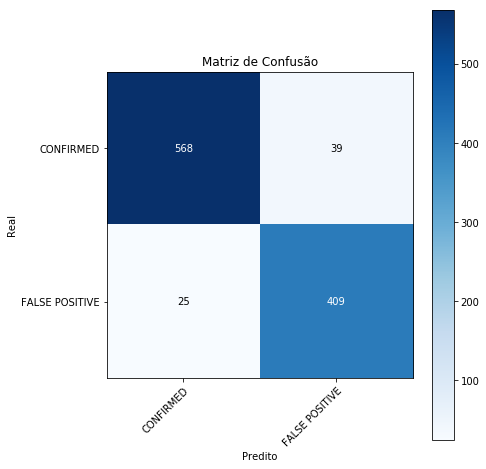

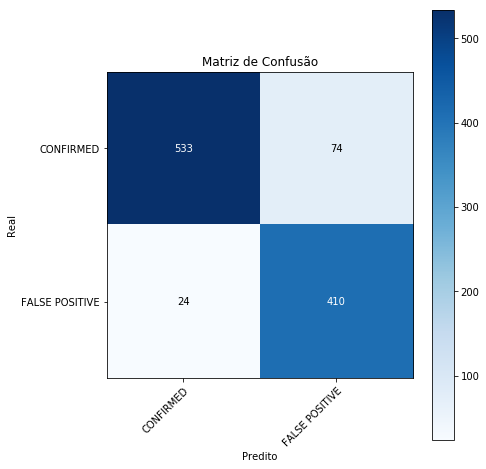

In [45]:
confusion_matriz(y_test,y_pred_svm_l)
confusion_matriz(y_test,y_pred_svm_s)

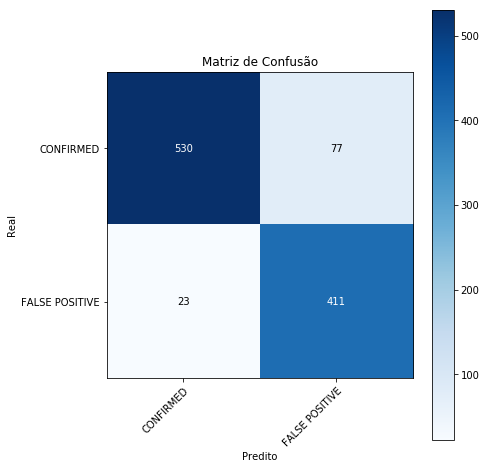

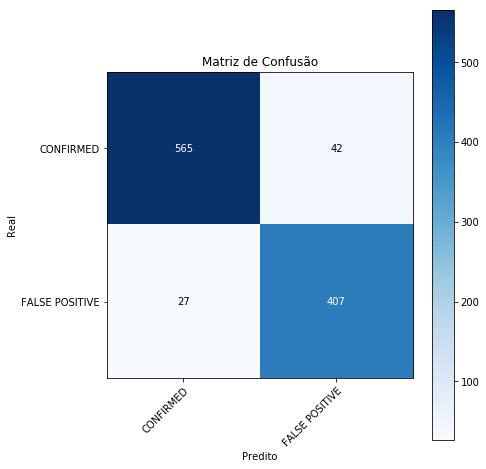

In [46]:
confusion_matriz(y_test,y_pred_svm_p)
confusion_matriz(y_test,y_pred_svm_r)

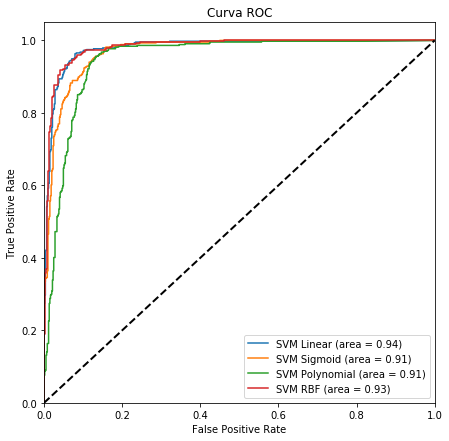

In [47]:
pl.figure(figsize=(7, 7))
lw = 2
pl.plot(fpr_svm_l, tpr_svm_l, label='SVM Linear (area = %0.2f)' % area_roc_svm_l)
pl.plot(fpr_svm_s, tpr_svm_s, label='SVM Sigmoid (area = %0.2f)' % area_roc_svm_s)
pl.plot(fpr_svm_p, tpr_svm_p, label='SVM Polynomial (area = %0.2f)' % area_roc_svm_p)
pl.plot(fpr_svm_r, tpr_svm_r, label='SVM RBF (area = %0.2f)' % area_roc_svm_r)
pl.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.legend(loc='best')
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Curva ROC')
pl.show()

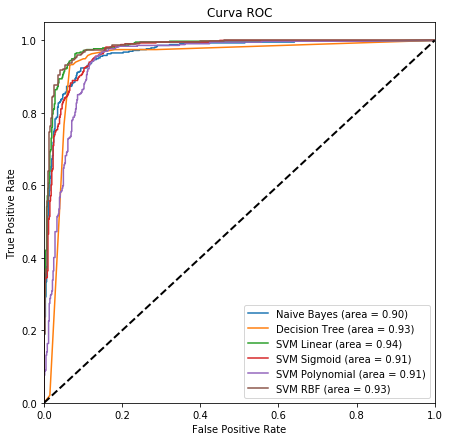

In [48]:
pl.figure(figsize=(7, 7))
lw = 2
pl.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (area = %0.2f)' % area_roc_gnb)
pl.plot(fpr_dtc, tpr_dtc, label='Decision Tree (area = %0.2f)' % area_roc_dtc)
pl.plot(fpr_svm_l, tpr_svm_l, label='SVM Linear (area = %0.2f)' % area_roc_svm_l)
pl.plot(fpr_svm_s, tpr_svm_s, label='SVM Sigmoid (area = %0.2f)' % area_roc_svm_s)
pl.plot(fpr_svm_p, tpr_svm_p, label='SVM Polynomial (area = %0.2f)' % area_roc_svm_p)
pl.plot(fpr_svm_r, tpr_svm_r, label='SVM RBF (area = %0.2f)' % area_roc_svm_r)
pl.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.legend(loc='best')
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Curva ROC')
pl.show()

The best combination of kernel and hyperparameter was the ___ model. As the curve underneth the ROC is higher and the validation score from the test score does not differs much. As well as the traning score does not goes to overfint (100% accurate).

## K - Nearest

Our goal is to partition the data set into some number K of clusters. Our goal is then to find an assignment of data points to clusters, and that the distance from the data points are at a minimum.

If k is to samall any new point will be placed in the same group (there is no good clustering). If the k is to big then each entry data point would be itself a cluster.

In [49]:
def knear_fit(k):
    kne=neighbors.KNeighborsClassifier(n_neighbors=k)
    #initializing the mean list
    score_mean=[]

    for k, (train, test) in enumerate(kf.split(X_train, y_train)):
        kne.fit(X_train.iloc[train], y_train.iloc[train])
        score_val=kne.score(X_train.iloc[test], y_train.iloc[test])
        score_mean.append(score_val)
       

    score_mean_np=np.asarray(score_mean)
    mean_score=score_mean_np.mean()
    val_score=accuracy_score(kne.predict(X_test), y_test)
    
    #PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
    predictedprobKne = kne.predict_proba(X_test)

    #GET ROC DATA
    fpr_kne, tpr_kne, _ = metrics.roc_curve(y_test, predictedprobKne[:,1])

    return kne, fpr_kne, tpr_kne, mean_score

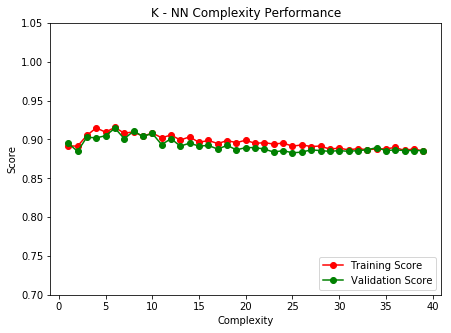

In [50]:
#Initilize the lis for K - NN scores

kne_score_training_list=[]

kne_score_test_list=[]

klist=list(range(1,40))

for k in klist:
    kne, fpr_kne, tpr_kne, kne_score_cv = knear_fit(k)
    kne_score_training_list.append(kne_score_cv)
    val_score=accuracy_score(kne.predict(X_test), y_test)
    kne_score_test_list.append(val_score)

score_dict_training["kne_score"]=kne_score_training_list
score_dict_test["kne_score"]=kne_score_test_list

fit_score_plot(np.asarray(score_dict_training["kne_score"]), np.asarray(score_dict_test["kne_score"]), klist, "K - NN")

The best data point was close to k=6. Because then the validation scores starts to decrease.

In [51]:
#GET ROC DATA
kne, fpr_kne, tpr_kne, _ = knear_fit(6)

In [52]:
y_pred_kne = kne.predict(X_test)
y_proba_kne = kne.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_kne, [0, 1], classes))

area_roc_kne=metrics.roc_auc_score(y_test,y_pred_kne)

                precision    recall  f1-score   support

     CONFIRMED       0.96      0.89      0.92       607
FALSE POSITIVE       0.86      0.94      0.90       434

   avg / total       0.92      0.91      0.91      1041



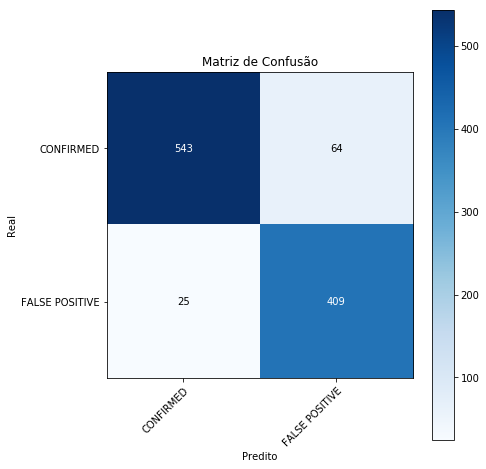

In [53]:
confusion_matriz(y_test,y_pred_kne)

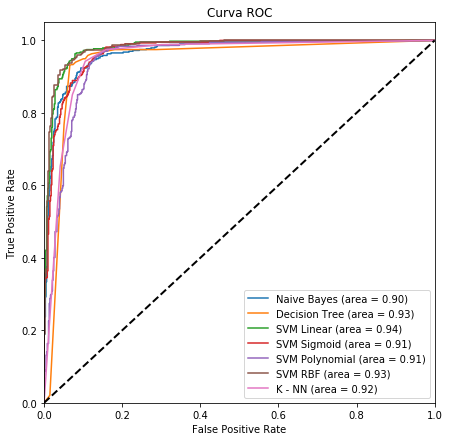

In [54]:
pl.figure(figsize=(7, 7))
lw = 2
pl.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (area = %0.2f)' % area_roc_gnb)
pl.plot(fpr_dtc, tpr_dtc, label='Decision Tree (area = %0.2f)' % area_roc_dtc)
pl.plot(fpr_svm_l, tpr_svm_l, label='SVM Linear (area = %0.2f)' % area_roc_svm_l)
pl.plot(fpr_svm_s, tpr_svm_s, label='SVM Sigmoid (area = %0.2f)' % area_roc_svm_s)
pl.plot(fpr_svm_p, tpr_svm_p, label='SVM Polynomial (area = %0.2f)' % area_roc_svm_p)
pl.plot(fpr_svm_r, tpr_svm_r, label='SVM RBF (area = %0.2f)' % area_roc_svm_r)
pl.plot(fpr_kne, tpr_kne, label='K - NN (area = %0.2f)' % area_roc_kne)
pl.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.legend(loc='best')
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Curva ROC')
pl.show()

## Random Forest

Random Forest is an esenble of Decison Trees. Instead of searching for the very best feature (max_depth as previously) when spliting a data set, it searches for the very best among a subset of features.

With a higher number of forest the bias goes down and the variance goes up. We need to decide on a compromise which would deliver the lowest error between accuracy from test data and training data as well as the highest value of accuracy.

In [55]:
def rf_fit(n_estimators_in):
    rf=ensemble.RandomForestClassifier(n_estimators=n_estimators_in)
    #initializing the mean list
    score_mean=[]

    for k, (train, test) in enumerate(kf.split(X_train, y_train)):
        rf.fit(X_train.iloc[train], y_train.iloc[train])
        score_val=rf.score(X_train.iloc[test], y_train.iloc[test])
        score_mean.append(score_val)
        #print("[fold {0}] , score: {1:.5f}".format(k, score_val))

    score_mean_np=np.asarray(score_mean)
    mean_score=score_mean_np.mean()
    val_score=accuracy_score(rf.predict(X_test), y_test)
    
    #PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
    predictedprobrf = rf.predict_proba(X_test)

    #GET ROC DATA
    fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, predictedprobrf[:,1])
    
    #print("Mean cv score = {0:.5f}".format(mean_score))
    #print("Validation score = {0:.5f}".format(val_score))
    return rf, fpr_rf, tpr_rf, mean_score

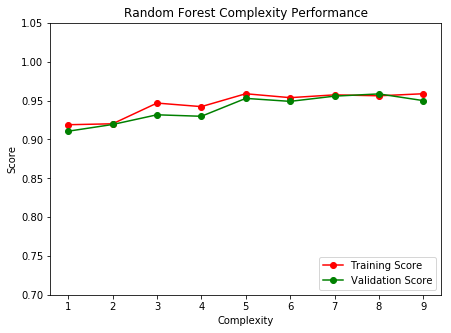

In [56]:
#Initilize the lis for Random Forest scores

rf_score_training_list=[]

rf_score_test_list=[]

n_estimators=np.arange(1,10,1)

for n in n_estimators:
    rf, fpr_rf, tpr_rf, rf_score_cv = rf_fit(n)
    rf_score_training_list.append(rf_score_cv)
    val_score=accuracy_score(rf.predict(X_test), y_test)
    rf_score_test_list.append(val_score)

score_dict_training["rf_score"]=rf_score_training_list
score_dict_test["rf_score"]=rf_score_test_list

fit_score_plot(np.asarray(score_dict_training["rf_score"]), np.asarray(score_dict_test["rf_score"]), n_estimators, "Random Forest")

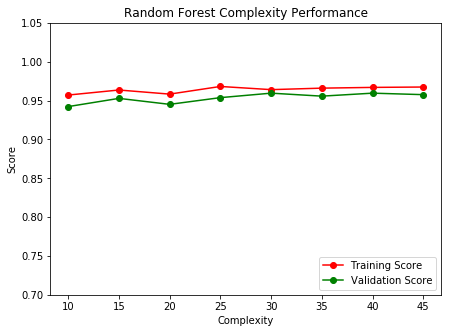

In [57]:
#Initilize the lis for Random Forest scores

rf_score_training_list=[]

rf_score_test_list=[]

n_estimators=np.arange(10,50,5)

for n in n_estimators:
    rf, fpr_rf, tpr_rf, rf_score_cv = rf_fit(n)
    rf_score_training_list.append(rf_score_cv)
    val_score=accuracy_score(rf.predict(X_test), y_test)
    rf_score_test_list.append(val_score)

score_dict_training["rf_score"]=rf_score_training_list
score_dict_test["rf_score"]=rf_score_test_list

fit_score_plot(np.asarray(score_dict_training["rf_score"]), np.asarray(score_dict_test["rf_score"]), n_estimators, "Random Forest")

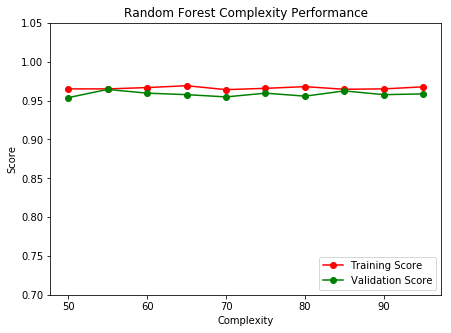

In [58]:
#Initilize the lis for Random Forest scores

rf_score_training_list=[]

rf_score_test_list=[]

n_estimators=np.arange(50,100,5)

for n in n_estimators:
    rf, fpr_rf, tpr_rf, rf_score_cv = rf_fit(n)
    rf_score_training_list.append(rf_score_cv)
    val_score=accuracy_score(rf.predict(X_test), y_test)
    rf_score_test_list.append(val_score)

score_dict_training["rf_score"]=rf_score_training_list
score_dict_test["rf_score"]=rf_score_test_list

fit_score_plot(np.asarray(score_dict_training["rf_score"]), np.asarray(score_dict_test["rf_score"]), n_estimators, "Random Forest")

In [59]:
#GET ROC DATA
rf, fpr_rf, tpr_rf, _ = rf_fit(55)

In [60]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_rf, [0, 1], classes))

area_roc_rf=metrics.roc_auc_score(y_test,y_pred_rf)

                precision    recall  f1-score   support

     CONFIRMED       0.95      0.97      0.96       607
FALSE POSITIVE       0.96      0.94      0.95       434

   avg / total       0.96      0.96      0.96      1041



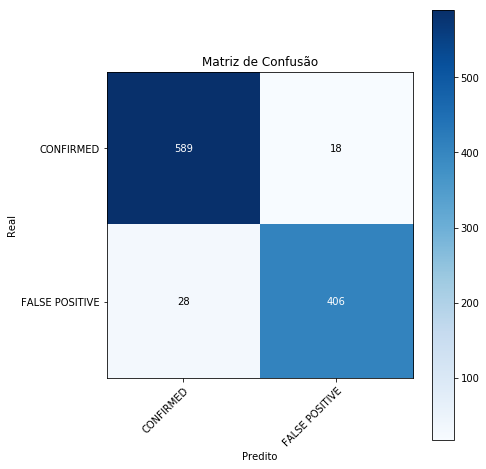

In [61]:
confusion_matriz(y_test,y_pred_rf)

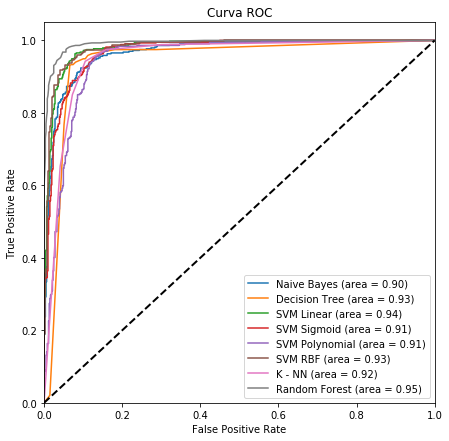

In [62]:
pl.figure(figsize=(7, 7))
lw = 2
pl.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (area = %0.2f)' % area_roc_gnb)
pl.plot(fpr_dtc, tpr_dtc, label='Decision Tree (area = %0.2f)' % area_roc_dtc)
pl.plot(fpr_svm_l, tpr_svm_l, label='SVM Linear (area = %0.2f)' % area_roc_svm_l)
pl.plot(fpr_svm_s, tpr_svm_s, label='SVM Sigmoid (area = %0.2f)' % area_roc_svm_s)
pl.plot(fpr_svm_p, tpr_svm_p, label='SVM Polynomial (area = %0.2f)' % area_roc_svm_p)
pl.plot(fpr_svm_r, tpr_svm_r, label='SVM RBF (area = %0.2f)' % area_roc_svm_r)
pl.plot(fpr_kne, tpr_kne, label='K - NN (area = %0.2f)' % area_roc_kne)
pl.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % area_roc_rf)
pl.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.legend(loc='best')
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Curva ROC')
pl.show()

## Gradient Tree Boosting

The parameter n_estimators represents the number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

In [63]:
def gtb_fit(n_estimators_in):
    gtb=ensemble.GradientBoostingClassifier(n_estimators=n_estimators_in)
    #initializing the mean list
    score_mean=[]

    for k, (train, test) in enumerate(kf.split(X_train, y_train)):
        gtb.fit(X_train.iloc[train], y_train.iloc[train])
        score_val=gtb.score(X_train.iloc[test], y_train.iloc[test])
        score_mean.append(score_val)
        #print("[fold {0}] , score: {1:.5f}".format(k, score_val))

    score_mean_np=np.asarray(score_mean)
    mean_score = score_mean_np.mean()
    val_score=accuracy_score(gtb.predict(X_test), y_test)
    
    #PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
    predictedprobgtb = gtb.predict_proba(X_test)

    #GET ROC DATA
    fpr_gtb, tpr_gtb, _ = metrics.roc_curve(y_test, predictedprobgtb[:,1])
    
    #print("Mean cv score = {0:.5f}".format(mean_score))
    #print("Validation score = {0:.5f}".format(val_score))
    return gtb, fpr_gtb, tpr_gtb, mean_score

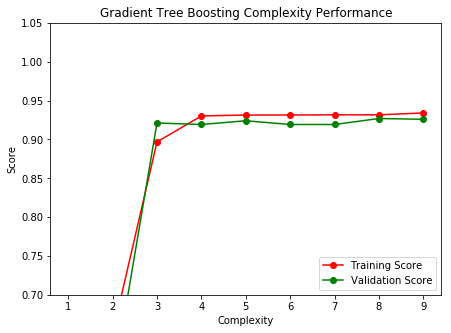

In [64]:
#Initilize the lis for Gradient Tree Boosting scores

gtb_score_training_list=[]

gtb_score_test_list=[]

n_estimators=np.arange(1,10,1)

for n in n_estimators:
    gtb, fpr_gtb, tpr_gtb, gtb_score_cv = gtb_fit(n)
    gtb_score_training_list.append(gtb_score_cv)
    val_score=accuracy_score(gtb.predict(X_test), y_test)
    gtb_score_test_list.append(val_score)

score_dict_training["gtb_score"]=gtb_score_training_list
score_dict_test["gtb_score"]=gtb_score_test_list

fit_score_plot(np.asarray(score_dict_training["gtb_score"]), np.asarray(score_dict_test["gtb_score"]), n_estimators, "Gradient Tree Boosting")

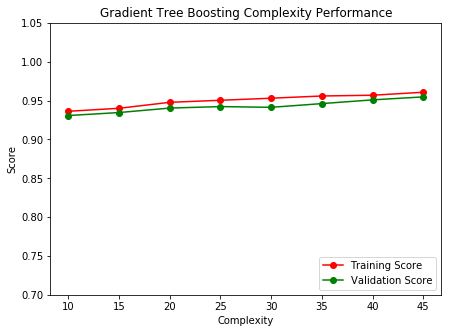

In [65]:
#Initilize the lis for Gradient Tree Boosting scores

gtb_score_training_list=[]

gtb_score_test_list=[]

n_estimators=np.arange(10,50,5)

for n in n_estimators:
    gtb, fpr_gtb, tpr_gtb, gtb_score_cv = gtb_fit(n)
    gtb_score_training_list.append(gtb_score_cv)
    val_score=accuracy_score(gtb.predict(X_test), y_test)
    gtb_score_test_list.append(val_score)

score_dict_training["gtb_score"]=gtb_score_training_list
score_dict_test["gtb_score"]=gtb_score_test_list

fit_score_plot(np.asarray(score_dict_training["gtb_score"]), np.asarray(score_dict_test["gtb_score"]), n_estimators, "Gradient Tree Boosting")

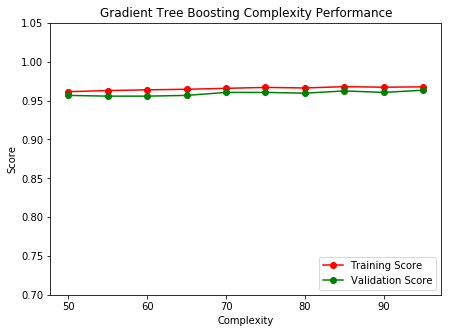

In [66]:
#Initilize the lis for Gradient Tree Boosting scores

gtb_score_training_list=[]

gtb_score_test_list=[]

n_estimators=np.arange(50,100,5)

for n in n_estimators:
    gtb, fpr_gtb, tpr_gtb, gtb_score_cv = gtb_fit(n)
    gtb_score_training_list.append(gtb_score_cv)
    val_score=accuracy_score(gtb.predict(X_test), y_test)
    gtb_score_test_list.append(val_score)

score_dict_training["gtb_score"]=gtb_score_training_list
score_dict_test["gtb_score"]=gtb_score_test_list

fit_score_plot(np.asarray(score_dict_training["gtb_score"]), np.asarray(score_dict_test["gtb_score"]), n_estimators, "Gradient Tree Boosting")

In [67]:
gtb, fpr_gtb, tpr_gtb, _= gtb_fit(100)

In [68]:
y_pred_gtb = gtb.predict(X_test)
y_proba_gtb = gtb.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_gtb, [0, 1], classes))

area_roc_gtb=metrics.roc_auc_score(y_test,y_pred_gtb)

                precision    recall  f1-score   support

     CONFIRMED       0.97      0.97      0.97       607
FALSE POSITIVE       0.95      0.96      0.96       434

   avg / total       0.96      0.96      0.96      1041



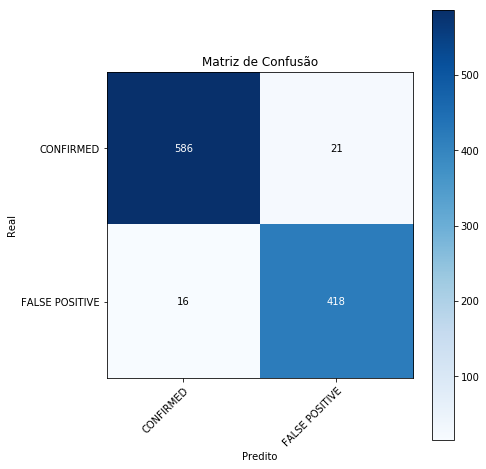

In [69]:
confusion_matriz(y_test,y_pred_gtb)

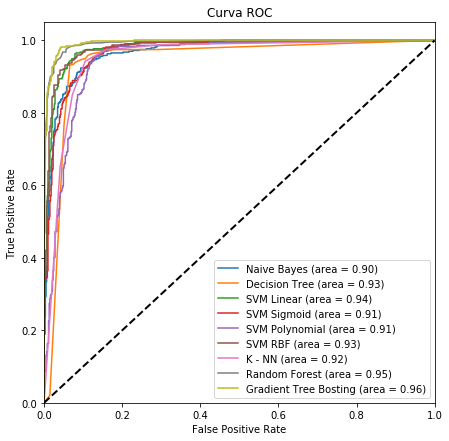

In [70]:
pl.figure(figsize=(7, 7))
lw = 2
pl.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (area = %0.2f)' % area_roc_gnb)
pl.plot(fpr_dtc, tpr_dtc, label='Decision Tree (area = %0.2f)' % area_roc_dtc)
pl.plot(fpr_svm_l, tpr_svm_l, label='SVM Linear (area = %0.2f)' % area_roc_svm_l)
pl.plot(fpr_svm_s, tpr_svm_s, label='SVM Sigmoid (area = %0.2f)' % area_roc_svm_s)
pl.plot(fpr_svm_p, tpr_svm_p, label='SVM Polynomial (area = %0.2f)' % area_roc_svm_p)
pl.plot(fpr_svm_r, tpr_svm_r, label='SVM RBF (area = %0.2f)' % area_roc_svm_r)
pl.plot(fpr_kne, tpr_kne, label='K - NN (area = %0.2f)' % area_roc_kne)
pl.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % area_roc_rf)
pl.plot(fpr_gtb, tpr_gtb, label='Gradient Tree Bosting (area = %0.2f)' % area_roc_gtb)
pl.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.legend(loc='best')
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Curva ROC')
pl.show()

## Conclusion

The model with the best ROC and with almost no training/search from best hyperparameter was the Gradient Tree Bosting with a 0.96 area bellow the ROC curve.

Compared to the send best Random Forest of 0.95 of area underneath the ROC curve. The score from the Random Forest was.
